<a href="https://colab.research.google.com/github/polina-minaeva/mathematics-for-data-science/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D0%BF%D0%BE%20%D0%BA%D1%83%D1%80%D1%81%D1%83%20%22%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B4%D0%BB%D1%8F%20Data%20Science%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp #Загрузила библиотеки
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline

**Задание 1.**

Вычислите производную функции в точке x0 = 1

In [ ]:
#Дана такая функция: tg(sin(x) + cos(2*x + 3))**2

In [ ]:
x = symbols('x') #Превратила x в символическое значение
expr = tan(sin(x) + cos(2*x + 3))**2 #Записала функцию

#Использовала метод lambdify() для превращения символического выражения в функцию
f = lambdify(x, expr, "math")

In [ ]:
expr

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
deriv = sp.diff(expr, x) #Дифференцировала функцию по переменной x и нашла первую производную функции

In [ ]:
deriv

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
#Узнала значение производной в точке х=1: использовала функцию subs
deriv.subs(x, 1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

**Задание 2.**

Дан объект в 2D пространстве

(-200.0, 200.0)

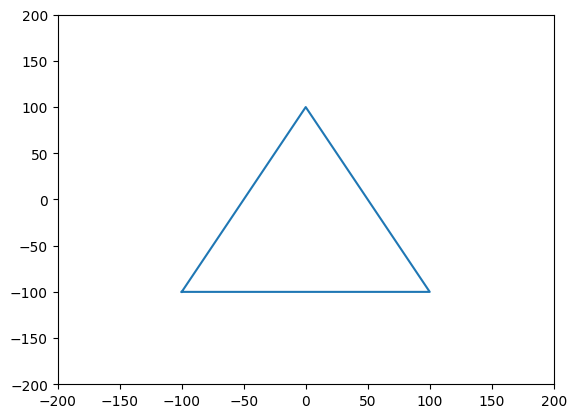

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

In [ ]:
A

array([[-100, -100,    1],
       [   0,  100,    1],
       [ 100, -100,    1],
       [-100, -100,    1]])

In [ ]:
B = np.array([[0.5, 0, 0], #Написала матрицу масштабирования со значениями параметров a, d, определенных условиями задания
              [0, 1.2, 0],
              [0, 0, 1]])

In [ ]:
scal = np.dot(A, B) #Умножила матрицу A на матрицу масштабирования для проведения преобразований

(-200.0, 200.0)

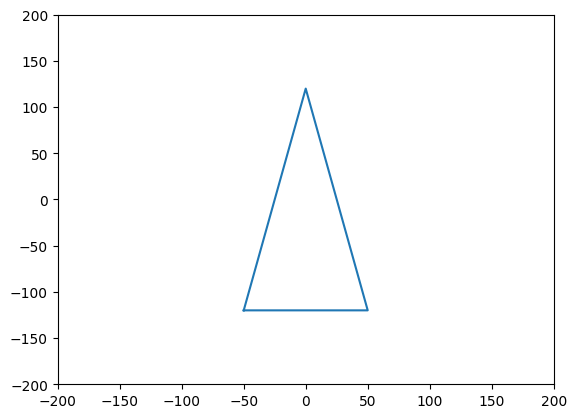

In [ ]:
A = np.array(scal)

x = A[:,0] #Визуализировала полученный треугольник
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
C = np.array([[1, 0, 0], #Написала матрицу смещения со значениями параметров e, f, определенных условиями задания
              [0, 1, 0],
              [200, 300, 1]])

In [ ]:
displac = np.dot(scal, C) #Умножила полученную в результате масштабирования матрицу на матрицу смещения для проведения преобразований

(-200.0, 400.0)

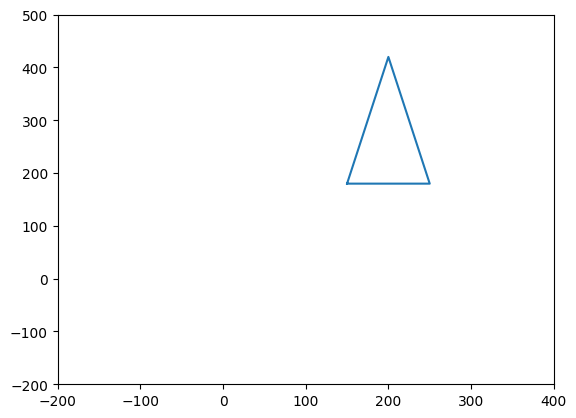

In [ ]:
A = np.array(displac)

x = A[:,0] #Визуализировала полученный треугольник
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 500])
plt.xlim([-200, 400])

**Задание 3.**

Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])

In [ ]:
np.linalg.eig(m) #Использовала функцию eig для одновременного нахождения собственных значений (первая скобка) и векторов (вторая скобка)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

**Задание 4.**

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [2]:
def f(x, a, b): #Дана такая функция
    return np.e**a * np.sin(b*x) + x

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158, #Дан массив значений x
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571, #Определены значения функции в точках x
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

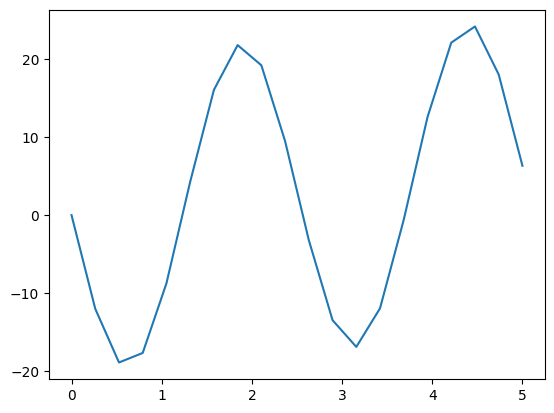

In [4]:
plt.plot(x, fx)
plt.show()

In [5]:
def error(params): #Функция для проверки ошибки
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [7]:
all_params = curve_fit(f, x, fx, p0=[0,1]) #Применила функцию curve_fit для определения параментов a и b функции f

In [8]:
all_params

(array([ 3. , -2.5]),
 array([[ 2.68953112e-18, -5.23196246e-20],
        [-5.23196246e-20,  2.80481711e-19]]))

In [9]:
params = all_params[0] #Это a и b

In [10]:
error(params) #Подставила параметры в функцию для определения ошибки

1.5365230368047378e-06

**Задание 5.**

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов)).

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [ ]:
distance_matrix = pairwise_distances(raitings, metric='cosine') #Применила метод pairwise_distances для определения косинусного расстояния между пользователями

In [ ]:
distance_matrix #Для каждого пользователя представлено косинусное расстояние со всеми другими пользователями (включая его самого - равно 0)

array([[ 0.        , 15.49193338, 13.78404875, 15.96871942, 15.23154621,
        18.        , 18.46618531, 15.06651917, 11.5758369 , 16.        ],
       [15.49193338,  0.        , 15.87450787, 14.31782106, 13.26649916,
        15.23154621, 15.26433752, 16.09347694, 16.24807681, 17.94435844],
       [13.78404875, 15.87450787,  0.        , 13.07669683, 16.30950643,
        15.8113883 , 19.67231557, 16.21727474, 16.0623784 , 13.03840481],
       [15.96871942, 14.31782106, 13.07669683,  0.        , 18.62793601,
        15.26433752, 13.56465997, 12.80624847, 17.63519209, 16.82260384],
       [15.23154621, 13.26649916, 16.30950643, 18.62793601,  0.        ,
        16.55294536, 16.34013464, 14.73091986, 13.34166406, 16.73320053],
       [18.        , 15.23154621, 15.8113883 , 15.26433752, 16.55294536,
         0.        , 17.57839583, 13.15294644, 16.673332  , 16.37070554],
       [18.46618531, 15.26433752, 19.67231557, 13.56465997, 16.34013464,
        17.57839583,  0.        , 13.85640646

In [ ]:
i = -1 #Создала переменную для определения индекса пользователя
for cos_dist in distance_matrix: #Через цикл обратилась к каждому пользователю
  i += 1
  second_list = np.sort(cos_dist)
  similar_user = second_list[1] #Создала второй список значений косинусных расстояний от меньшего к большему и отобрала значение с индексом 1 (пропускаю 0)
  index_of_sim_user = np.where(cos_dist == similar_user) #Определила индекс похожего пользователя через функцию np.where()
  integer = int("".join(str(x) for el in index_of_sim_user for x in el)) #Извлекла число из массива, который определяет индекс похожего пользователя
  print(i, integer) #Для каждого пользователя подобрала в пару похожего пользователя и написала его индекс

0 8
1 4
2 9
3 7
4 1
5 7
6 3
7 3
8 0
9 2
